Missing values before processing:
Unnamed: 0            0
name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter           322
dtype: int64

Basic information after dropping missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        510 non-null    int64  
 1   name              510 non-null    object 
 2   full_name         227 non-null    object 
 3   age               510 non-null    int64  
 4   height            510 non-null    float64
 5   nationality       510 non-null    object 
 6   place_of_birth

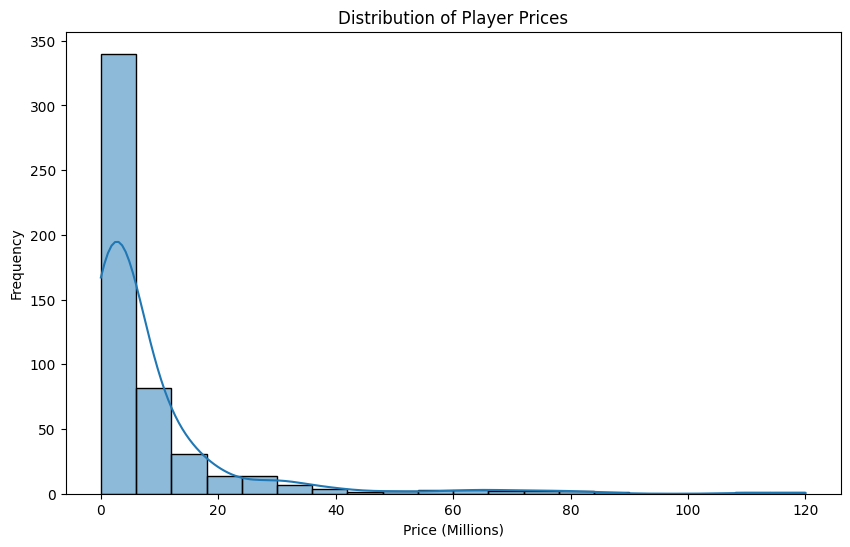

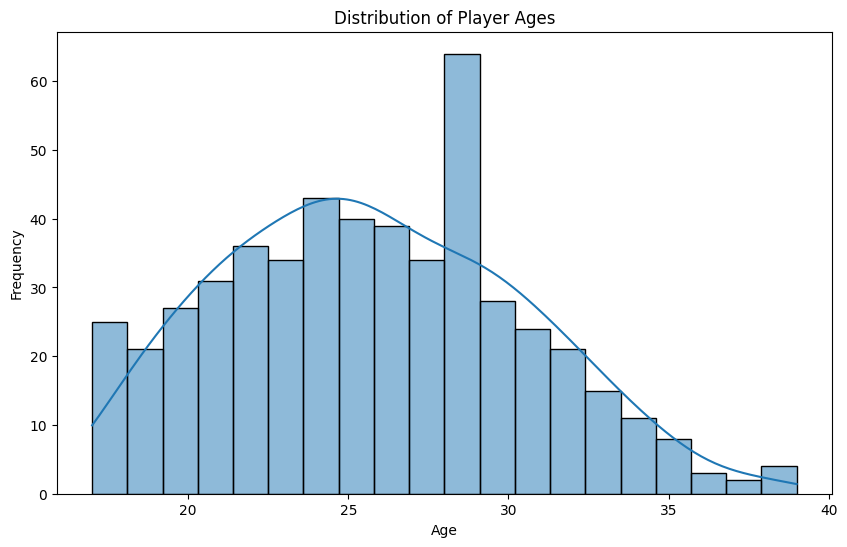


X_train shape: (408, 1)
X_test shape: (102, 1)
y_train shape: (408,)
y_test shape: (102,)

Random Forest Regressor Metrics:
MAE: 8.061329627973139
RMSE: 13.370172811799426

Gradient Boosting Regressor Metrics:
MAE: 8.03307801552173
RMSE: 13.343852165079245

Performance Comparison:
               Model       MAE       RMSE
0      Random Forest  8.061330  13.370173
1  Gradient Boosting  8.033078  13.343852

Models have been saved successfully!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

# Load dataset
file_path = 'bundesliga_player.csv'
data = pd.read_csv(file_path)

# Check for missing values
print("Missing values before processing:")
print(data.isnull().sum())

# Drop rows with missing values in the 'price' column
data = data.dropna(subset=['price'])

# Basic information after dropping missing values
print("\nBasic information after dropping missing values:")
print(data.info())

# Visualize distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Player Prices')
plt.xlabel('Price (Millions)')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of the feature variable (age)
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Drop unnecessary columns
data_processed = data.drop(['name', 'full_name', 'nationality', 'place_of_birth'], axis=1)

# Separate features (X) and target variable (y)
X = data_processed[['age']]
y = data_processed['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Initialize the model - RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\nRandom Forest Regressor Metrics:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)

# Initialize the model - GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = gbr.predict(X_test)

# Calculate metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("\nGradient Boosting Regressor Metrics:")
print("MAE:", mae_gbr)
print("RMSE:", rmse_gbr)

# Performance Comparison
results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'MAE': [mae_rf, mae_gbr],
    'RMSE': [rmse_rf, rmse_gbr]
})
print("\nPerformance Comparison:")
print(results)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Save Gradient Boosting model
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(gbr, file)

print("\nModels have been saved successfully!")